In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
df = pd.read_csv("loan_approval_dataset (1).csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [5]:
df.shape

(4269, 13)

In [6]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [9]:
df.drop(['loan_id'],axis=1)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [10]:
df.nunique()

loan_id                      4269
 no_of_dependents               6
 education                      2
 self_employed                  2
 income_annum                  98
 loan_amount                  378
 loan_term                     10
 cibil_score                  601
 residential_assets_value     278
 commercial_assets_value      188
 luxury_assets_value          379
 bank_asset_value             146
 loan_status                    2
dtype: int64

In [11]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [12]:
df[' education'].value_counts()

 Graduate        2144
 Not Graduate    2125
Name:  education, dtype: int64

In [13]:
df[' loan_status'].value_counts()

 Approved    2656
 Rejected    1613
Name:  loan_status, dtype: int64

In [14]:
df[' self_employed'].value_counts()

 Yes    2150
 No     2119
Name:  self_employed, dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df[' education'] = label_encoder.fit_transform(df[' education'])
df[' self_employed'] = label_encoder.fit_transform(df[' self_employed'])
df[' loan_status'] = label_encoder.fit_transform(df[' loan_status'])

df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


# Data Visualization

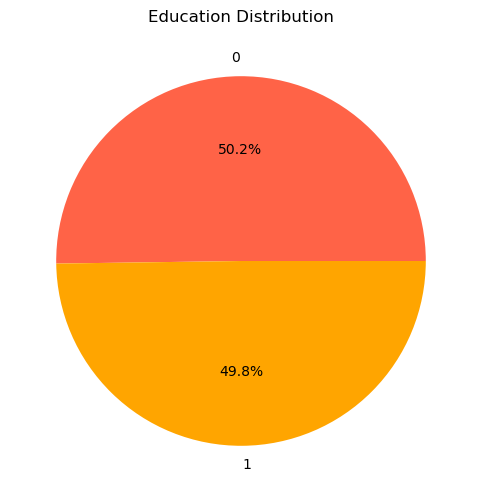

In [16]:
education_counts = df[' education'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', colors=['tomato', 'orange'])
plt.title('Education Distribution')
plt.show()

Text(0.5, 1.0, 'Number of Dependents')

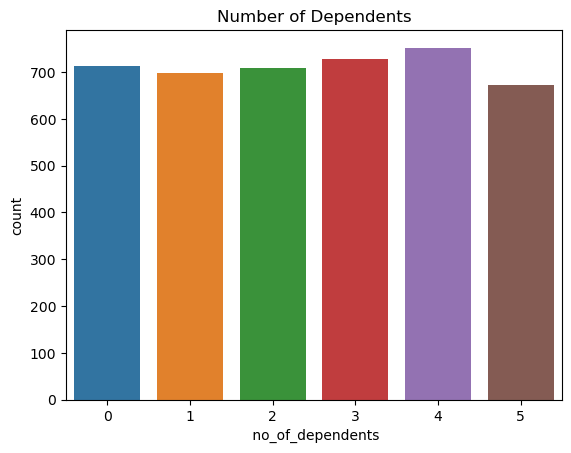

In [17]:
import seaborn as sns
sns.countplot(x = ' no_of_dependents', data = df).set_title('Number of Dependents')

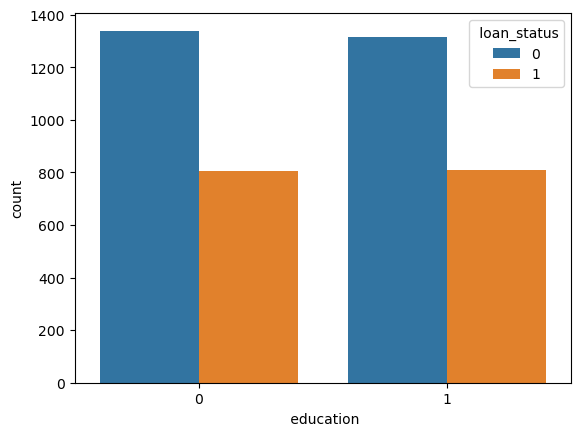

In [18]:
sns.countplot(data=df, x=" education", hue=" loan_status")
plt.show()

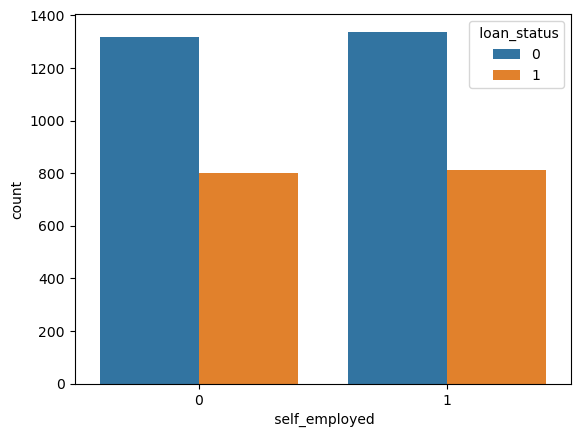

In [19]:
sns.countplot(data=df, x=" self_employed", hue=" loan_status")
plt.show()

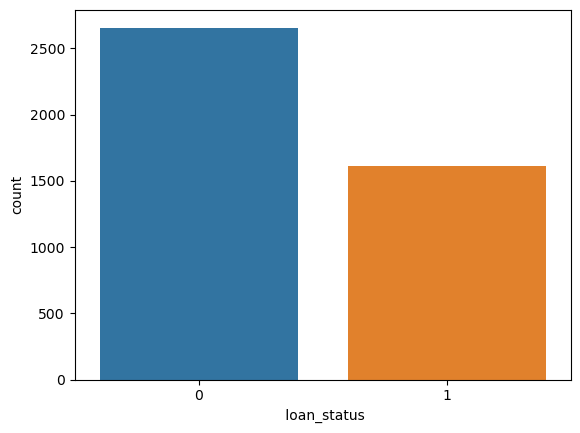

In [20]:
sns.countplot(data=df, x=" loan_status")
plt.show()

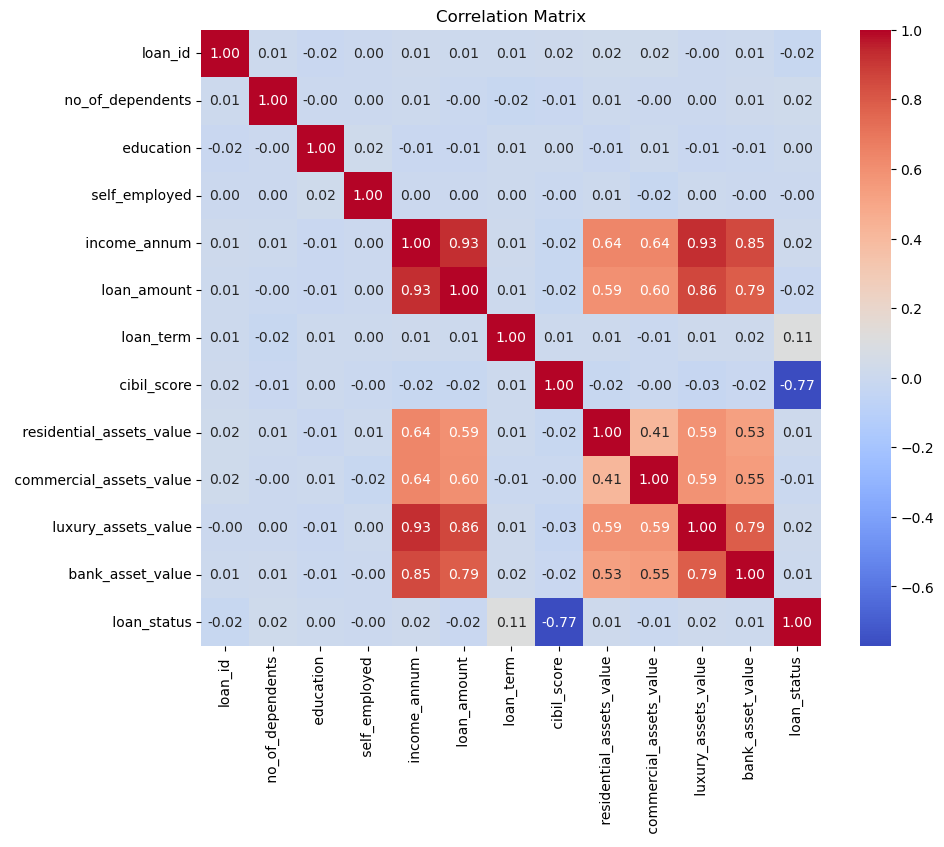

In [21]:
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   loan_id                    4269 non-null   int64
 1    no_of_dependents          4269 non-null   int64
 2    education                 4269 non-null   int32
 3    self_employed             4269 non-null   int32
 4    income_annum              4269 non-null   int64
 5    loan_amount               4269 non-null   int64
 6    loan_term                 4269 non-null   int64
 7    cibil_score               4269 non-null   int64
 8    residential_assets_value  4269 non-null   int64
 9    commercial_assets_value   4269 non-null   int64
 10   luxury_assets_value       4269 non-null   int64
 11   bank_asset_value          4269 non-null   int64
 12   loan_status               4269 non-null   int32
dtypes: int32(3), int64(10)
memory usage: 383.7 KB


In [23]:
x = df.drop(columns = [' loan_status'])
y = df[' loan_status']

In [24]:
x.shape

(4269, 12)

In [25]:
y.shape

(4269,)

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=9)
print( "Shape of X_train: ",x_train.shape)
print( "Shape of x_test: ",x_test.shape)
print( "Shape of y_train: ",y_train.shape)
print( "Shape of y_test: ",y_test.shape)

Shape of X_train:  (2988, 12)
Shape of x_test:  (1281, 12)
Shape of y_train:  (2988,)
Shape of y_test:  (1281,)


# logisticRegression

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
lr = LogisticRegression(solver='liblinear')
lr.fit(x_train, y_train)
a=lr.score(x_test,y_test)
print("Logistic Regression Accuracy: ", a)

Logistic Regression Accuracy:  0.7283372365339579


In [29]:
y_Pred2 = lr.predict(x_test)

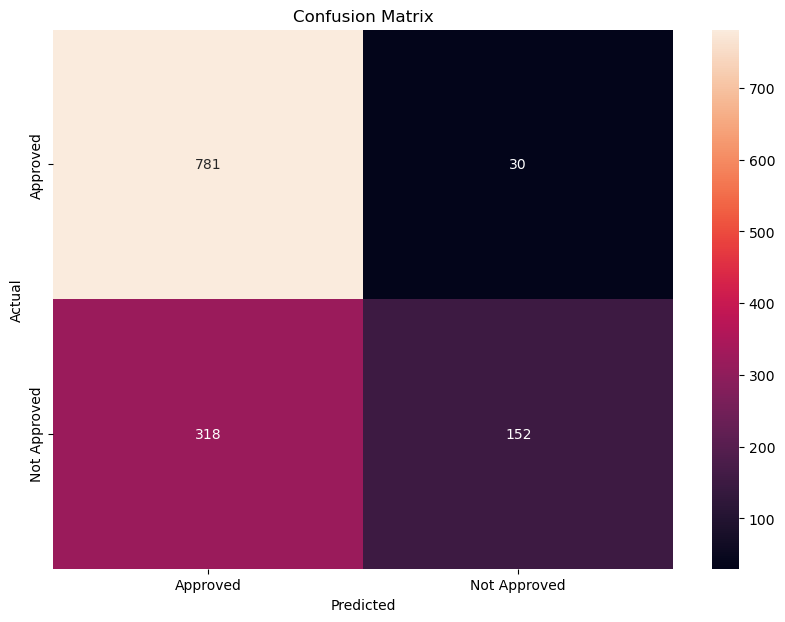

In [30]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_Pred2)
# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, 
            annot=True,
            fmt='d', 
            xticklabels=['Approved','Not Approved'],
            yticklabels=['Approved','Not Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [31]:


#Accuracy: The ratio of correct predictions to the total number of predictions= TP+TN/(TP + TN + FP + FN).
accuracy = accuracy_score(y_test, y_Pred2)

# precision =The ratio of true positive predictions to the total number of positive predictions =TP/(TP + FP)
precision = precision_score(y_test, y_Pred2)

#Recall(Sensitivity): The ratio of true positive predictions to the total number of actual positive instances recall= TP/(TP + FN) 
recall = recall_score(y_test, y_Pred2)

# The harmonic mean of precision and recall, which provides a balanced measure of the model’s performance.
f1 = f1_score(y_test, y_Pred2)
# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7283372365339579
Precision: 0.8351648351648352
Recall: 0.32340425531914896
F1 Score: 0.4662576687116564


In [32]:
pd.DataFrame({'Predicted':y_Pred2,'Actual':y_test}).round().sample(10)

,Predicted,Actual
884,0,0
3616,0,0
3221,0,1
876,0,1
619,0,0
2761,0,0
1209,0,0
2927,0,0
605,0,0
779,0,0


# SVC

In [33]:
from sklearn.svm import SVC

In [34]:
sc = SVC(gamma='auto',kernel='rbf')

In [35]:
sc.fit(x_train,y_train)

SVC(gamma='auto')

In [36]:
sc.score(x_test,y_test)

0.6330991412958626

In [37]:
y_Pred1 = sc.predict(x_test)

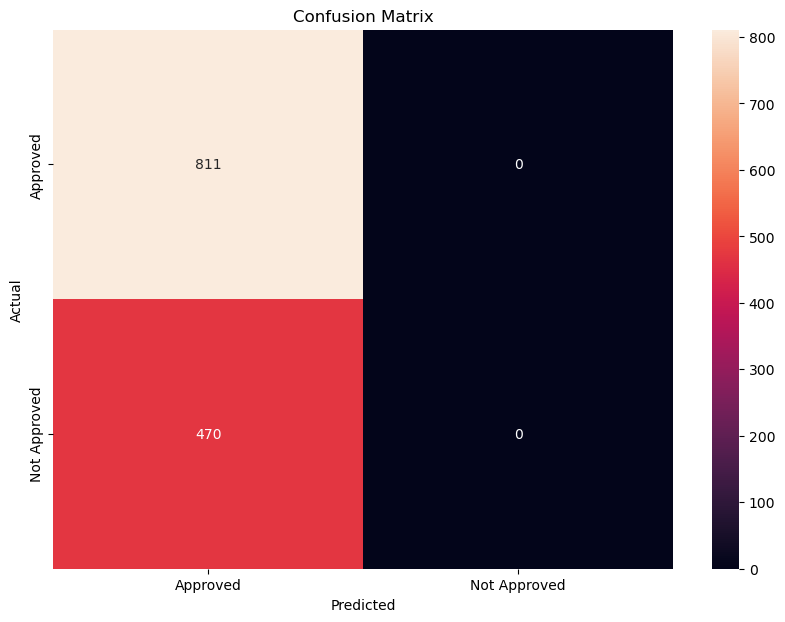

In [38]:
cm = confusion_matrix(y_test, y_Pred1)
# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, 
            annot=True,
            fmt='d', 
            xticklabels=['Approved','Not Approved'],
            yticklabels=['Approved','Not Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [39]:
#Accuracy: The ratio of correct predictions to the total number of predictions= TP+TN/(TP + TN + FP + FN).
accuracy = accuracy_score(y_test, y_Pred1)

# precision =The ratio of true positive predictions to the total number of positive predictions =TP/(TP + FP)
precision = precision_score(y_test, y_Pred1)

#Recall(Sensitivity): The ratio of true positive predictions to the total number of actual positive instances recall= TP/(TP + FN) 
recall = recall_score(y_test, y_Pred1)

# The harmonic mean of precision and recall, which provides a balanced measure of the model’s performance.
f1 = f1_score(y_test, y_Pred1)
# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6330991412958626
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
pd.DataFrame({'Predicted':y_Pred1,'Actual':y_test}).round().sample(10)

,Predicted,Actual
3316,0,1
175,0,0
2969,0,1
2008,0,0
1042,0,0
3657,0,1
3245,0,0
1190,0,1
1460,0,0
3848,0,0


# Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB

In [51]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
classifier.score(x_test, y_test)

0.7822014051522248

In [45]:
from sklearn.naive_bayes import BernoulliNB
classifier_B = BernoulliNB()
classifier_B.fit(x_train,y_train)
classifier_B.score(x_test,y_test)

0.6330991412958626

# DecisionTreeClassifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
ds = DecisionTreeClassifier(random_state=10)

In [41]:
ds.fit(x_train,y_train)

DecisionTreeClassifier(random_state=10)

In [42]:
ds.score(x_test,y_test)

0.9781420765027322

In [43]:
y_Pred3 = ds.predict(x_test)

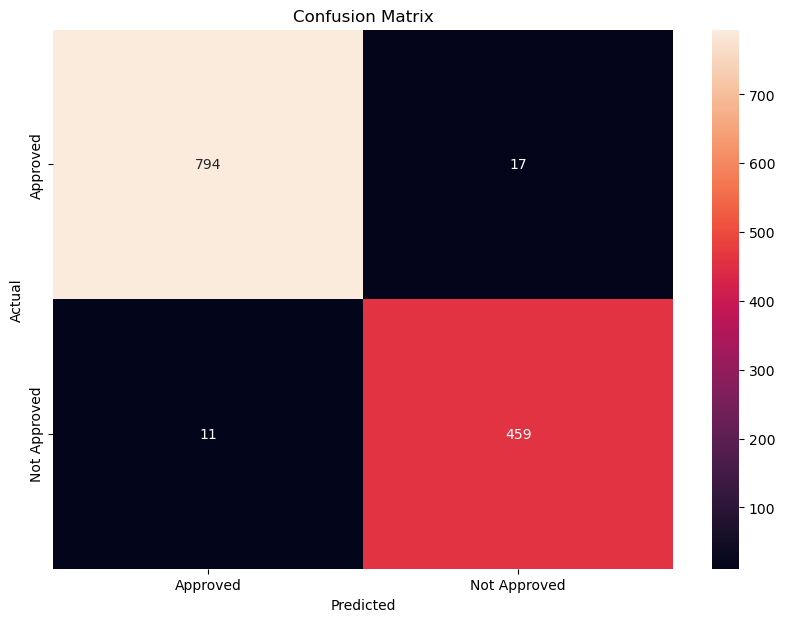

In [44]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_Pred3)
# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, 
            annot=True,
            fmt='d', 
            xticklabels=['Approved','Not Approved'],
            yticklabels=['Approved','Not Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [45]:
#Accuracy: The ratio of correct predictions to the total number of predictions= TP+TN/(TP + TN + FP + FN).
accuracy = accuracy_score(y_test, y_Pred3)

# precision =The ratio of true positive predictions to the total number of positive predictions =TP/(TP + FP)
precision = precision_score(y_test, y_Pred3)

#Recall(Sensitivity): The ratio of true positive predictions to the total number of actual positive instances recall= TP/(TP + FN) 
recall = recall_score(y_test, y_Pred3)

# The harmonic mean of precision and recall, which provides a balanced measure of the model’s performance.
f1 = f1_score(y_test, y_Pred3)
# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9781420765027322
Precision: 0.9642857142857143
Recall: 0.9765957446808511
F1 Score: 0.970401691331924


In [46]:
pd.DataFrame({'Predicted':y_Pred3,'Actual':y_test}).round().sample(10)

,Predicted,Actual
1985,1,1
1715,0,0
1816,0,0
803,1,1
714,0,0
2144,0,0
665,1,1
1028,1,1
3615,0,0
4241,0,0


# RandomForestClassifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
rf = RandomForestClassifier(n_estimators=50)

In [49]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [50]:
rf.score(x_test,y_test)

0.9789227166276346

In [51]:
y_Pred4 = rf.predict(x_test)

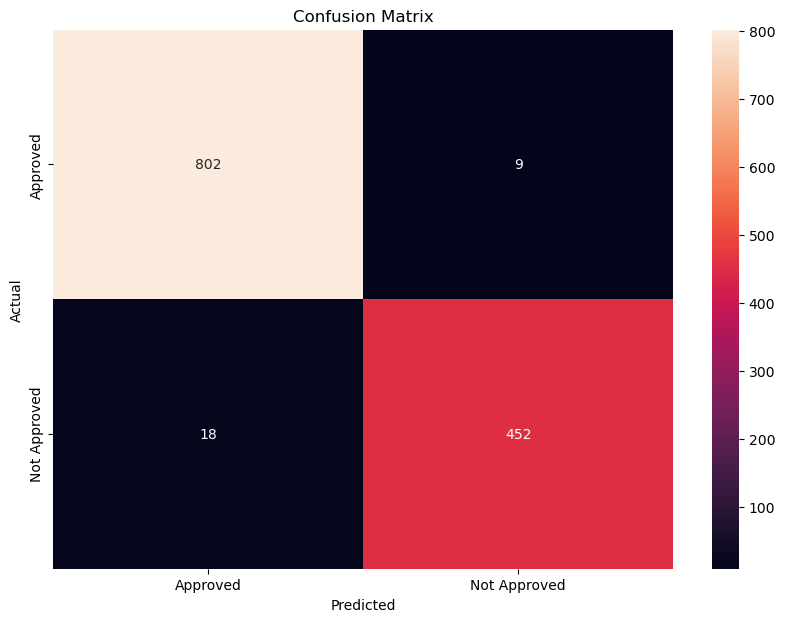

In [52]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_Pred4)
# Plotting the confusion matrix using seaborn
plt.figure(figsize=(10,7))
sns.heatmap(cm, 
            annot=True,
            fmt='d', 
            xticklabels=['Approved','Not Approved'],
            yticklabels=['Approved','Not Approved'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [53]:
#Accuracy: The ratio of correct predictions to the total number of predictions= TP+TN/(TP + TN + FP + FN).
accuracy = accuracy_score(y_test, y_Pred4)

# precision =The ratio of true positive predictions to the total number of positive predictions =TP/(TP + FP)
precision = precision_score(y_test, y_Pred4)

#Recall(Sensitivity): The ratio of true positive predictions to the total number of actual positive instances recall= TP/(TP + FN) 
recall = recall_score(y_test, y_Pred4)

# The harmonic mean of precision and recall, which provides a balanced measure of the model’s performance.
f1 = f1_score(y_test, y_Pred4)
# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9789227166276346
Precision: 0.9804772234273319
Recall: 0.9617021276595744
F1 Score: 0.9709989258861439


In [54]:
pd.DataFrame({'Predicted':y_Pred4,'Actual':y_test}).round().sample(10)

,Predicted,Actual
2449,0,0
2571,0,0
2800,0,0
3044,0,0
1065,0,1
1953,0,0
3557,1,1
4221,1,1
3155,1,1
2834,1,1


# K-Fold Cross Validation technique

In [53]:
from sklearn.model_selection import cross_val_score

In [56]:
score_rf = cross_val_score(RandomForestClassifier(n_estimators=10),x,y,cv=5)
#cv = 5 means we have 5 fold
print(score_rf)
print('Avg : ',np.average(score_rf))

[0.97306792 0.96838407 0.97423888 0.97775176 0.68112544]
Avg :  0.9149136125151346


In [57]:
score_ds = cross_val_score(DecisionTreeClassifier(criterion="gini"),x,y,cv=5)
#cv = 5 means we have 5 fold
print(score_rf)
print('Avg : ',np.average(score_ds))

[0.97306792 0.96838407 0.97423888 0.97775176 0.68112544]
Avg :  0.972591569635753


In [58]:
score_lr = cross_val_score(LogisticRegression(solver='liblinear'),x,y,cv=5)
print(score_lr)
print('Avg : ',np.average(score_lr))

[0.63348946 0.70257611 0.74590164 0.62177986 0.62368113]
Avg :  0.6654856396078312


In [58]:
score_sv = cross_val_score(SVC(),x,y,cv=5)
print(score_sv)
print('Avg : ',np.average(score_sv))

[0.62295082 0.62177986 0.62177986 0.62177986 0.62250879]
Avg :  0.6221598381247067


In [59]:
score_gn = cross_val_score(GaussianNB(),x,y,cv=5)
print(score_gn)
print('Avg : ',np.average(score_gn))

[0.82084309 0.76697892 0.76814988 0.74824356 0.71629543]
Avg :  0.7641021769151994
